### Flood Fill
[link to example](https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_floodfill.html#sphx-glr-auto-examples-segmentation-plot-floodfill-py)

Flood fill is an algorithm to indentify and/or change adjacent values in an image based on their similarity to an initial seed point. The conceptual analogy is the 'paint bucket' tool in many graphic editors.

#### Basic Example

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage

c:\Users\AdamSz\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


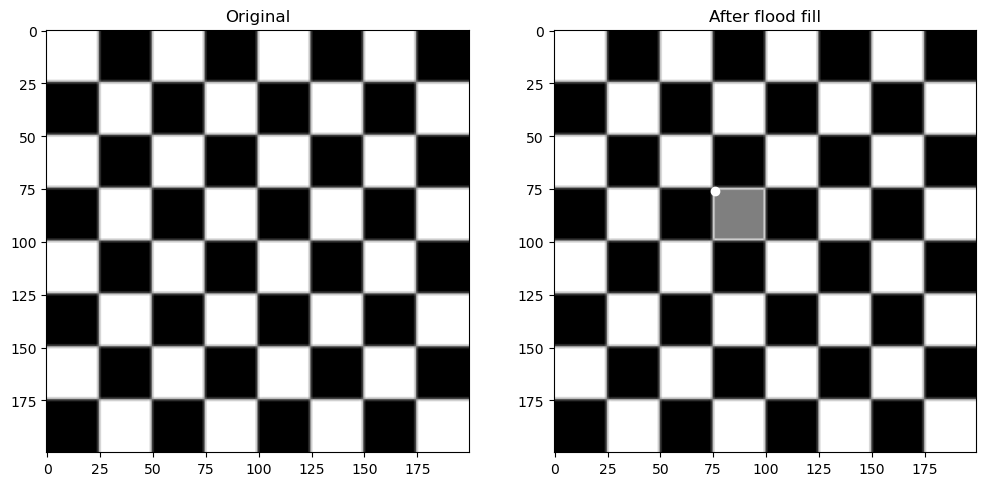

In [2]:
checkers = skimage.data.checkerboard()

# fill a square near the middle with value 127, starting at index (76, 76)
filled_checkers = skimage.segmentation.flood_fill(checkers, (76, 76), 127)

fig, ax = plt.subplots(ncols=2, figsize=(12,6))

ax[0].set_title('Original')
ax[0].imshow(checkers, cmap=plt.cm.gray)

ax[1].set_title('After flood fill')
ax[1].plot(76, 76, 'wo')
ax[1].imshow(filled_checkers, cmap=plt.cm.gray)

#### Advanced example

Because standard flood filling requires the neigbors to be strictly equal, its use is limited on real-world images with color gradients and noise. The *tolerance* keyword argument widens the permitted range about the initial value, allowing use on real-world images.

Here we will experimant a bit on the cameraman. First, turning his coat from dark to light.

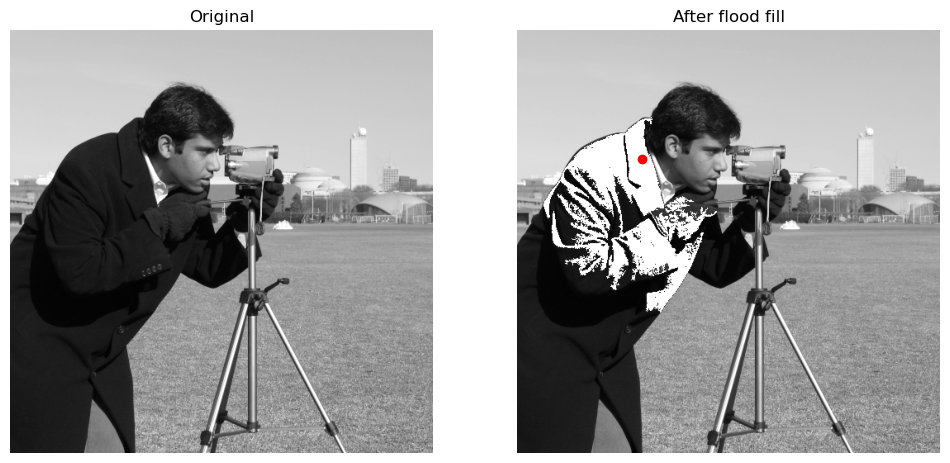

In [3]:
cameraman = skimage.data.camera()

light_coat = skimage.segmentation.flood_fill(cameraman, (155,150), 255, tolerance=10)

fig, ax = plt.subplots(ncols=2, figsize=(12,6))

ax[0].set_title('Original')
ax[0].imshow(cameraman, cmap=plt.cm.gray)
ax[0].axis('off')

ax[1].set_title('After flood fill')
ax[1].plot(150, 155, 'ro')
ax[1].imshow(light_coat, cmap=plt.cm.gray)
ax[1].axis('off')

plt.show()

The cameraman's coat is varying shades of gray. Only the parts of the coat matching the shade near the seed value is changed.

#### Experimentation with tolerance

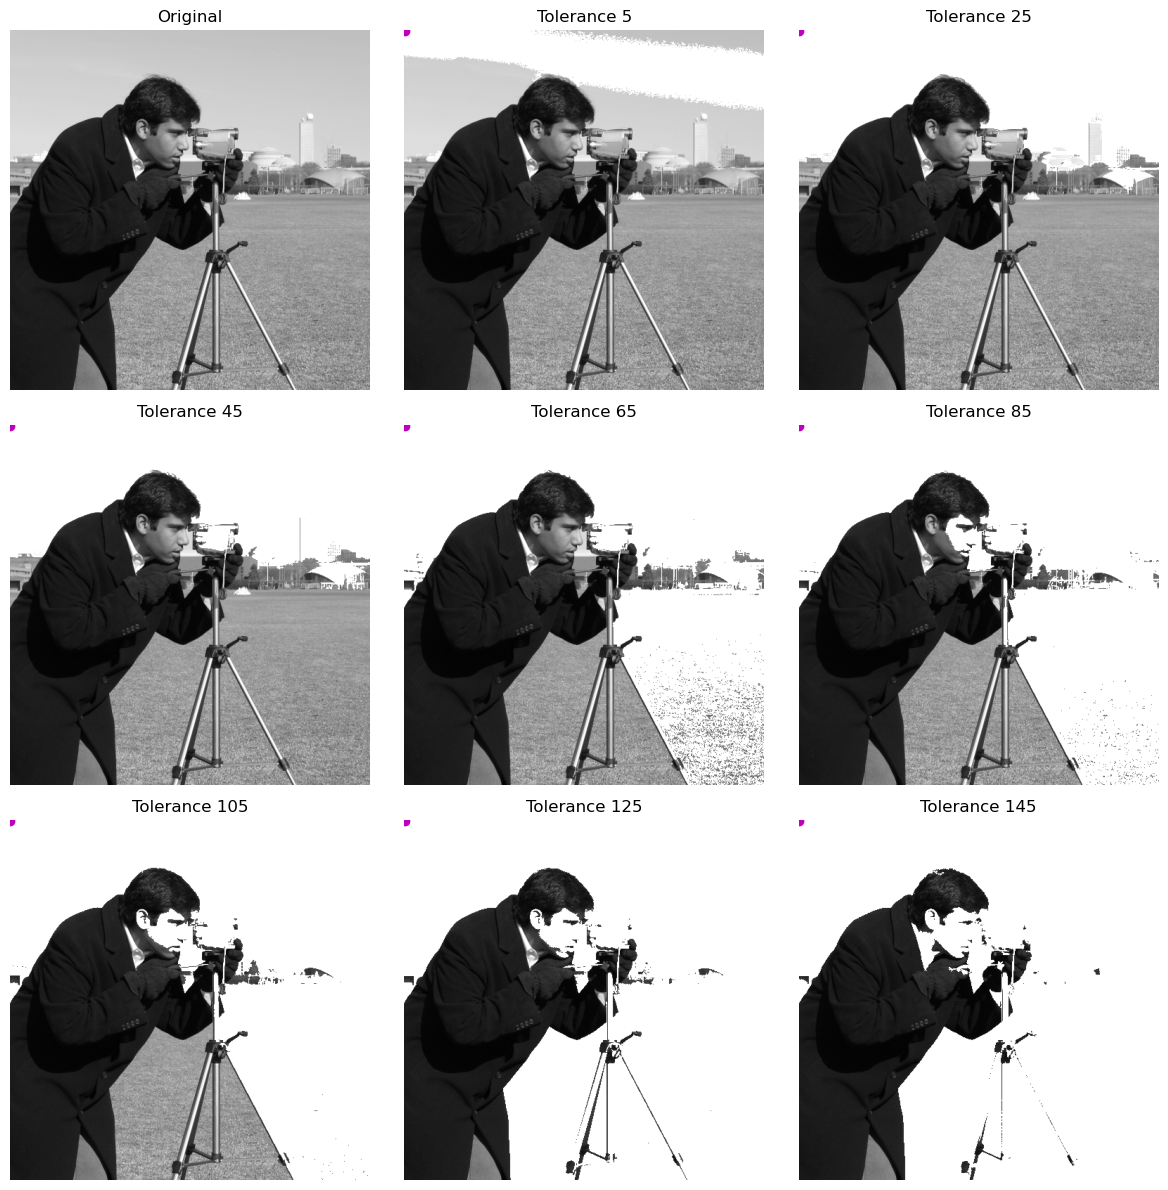

In [4]:
output = []

for i in range(8):
    tol = 5 + 20 * i
    output.append(skimage.segmentation.flood_fill(cameraman, (0,0), 255, tolerance=tol))

# Initialize plot and place original image
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12,12))
ax[0, 0].set_title('Original')
ax[0, 0].imshow(cameraman, cmap=plt.cm.gray)
ax[0, 0].axis('off')

# Plot all eight different tolerances for comparison
for i in range(8):
    m, n = np.unravel_index(i + 1, (3,3))
    ax[m, n].set_title(f'Tolerance {5 + 20 * i}')
    ax[m, n].imshow(output[i], cmap=plt.cm.gray)
    ax[m, n].plot(0,0, 'mo')
    ax[m, n].axis('off')

fig.tight_layout()
plt.show()

#### Flood as mask
A sister function `flood` is availabe which returns a mask indentifying the flood rather than modifying the image itself. This is useful for segmentation purposes and more advanced analysis pipelines.

Here we segment the nose of a cat. However, multi-channel images are not supported by `flood` or `flood_fill`. Instead we Sobel filter the red channel to enhance edges, then flood the nose with a tolerance.

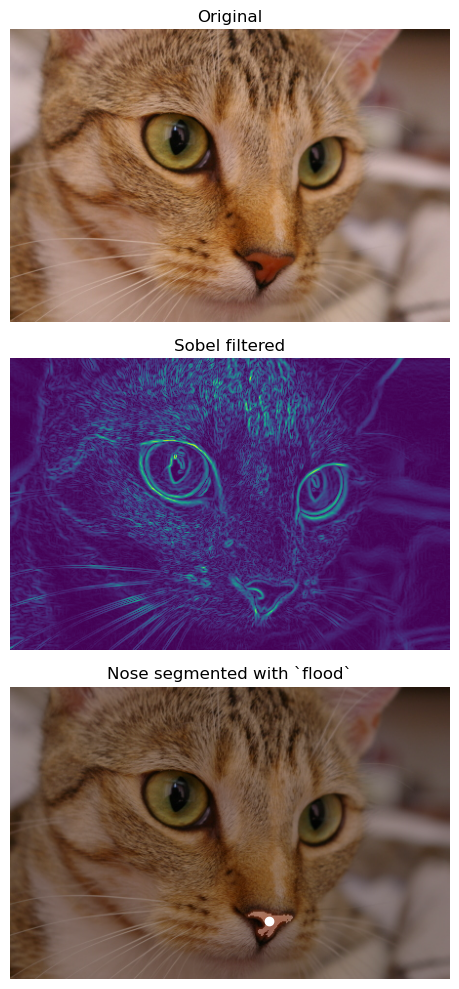

In [5]:
cat = skimage.data.chelsea()
cat_sobel = skimage.filters.sobel(cat[..., 0])
cat_nose = skimage.segmentation.flood(cat_sobel, (240, 265), tolerance=0.03)

fig, ax = plt.subplots(nrows=3, figsize=(12, 10))

ax[0].set_title('Original')
ax[0].imshow(cat)
ax[0].axis('off')

ax[1].set_title('Sobel filtered')
ax[1].imshow(cat_sobel)
ax[1].axis('off')


ax[2].set_title('Nose segmented with `flood`')
ax[2].imshow(cat)
ax[2].imshow(cat_nose, cmap=plt.cm.gray, alpha=0.3)
ax[2].plot(265, 240, 'wo') # seed point
ax[2].axis('off')


fig.tight_layout()
plt.show()

#### Flood-fill in HSV space and mask post-processing
Since flood fill operates on single-channel images, we transform here image to HSV (Hue, Saturation, Value) space in order to flood pixels of similar hue.

Int this example we also show that it is possible to post-process the binary mask returned by `skimage.segmentation.flood()` thanks to the functions of `skimage.morphology`.

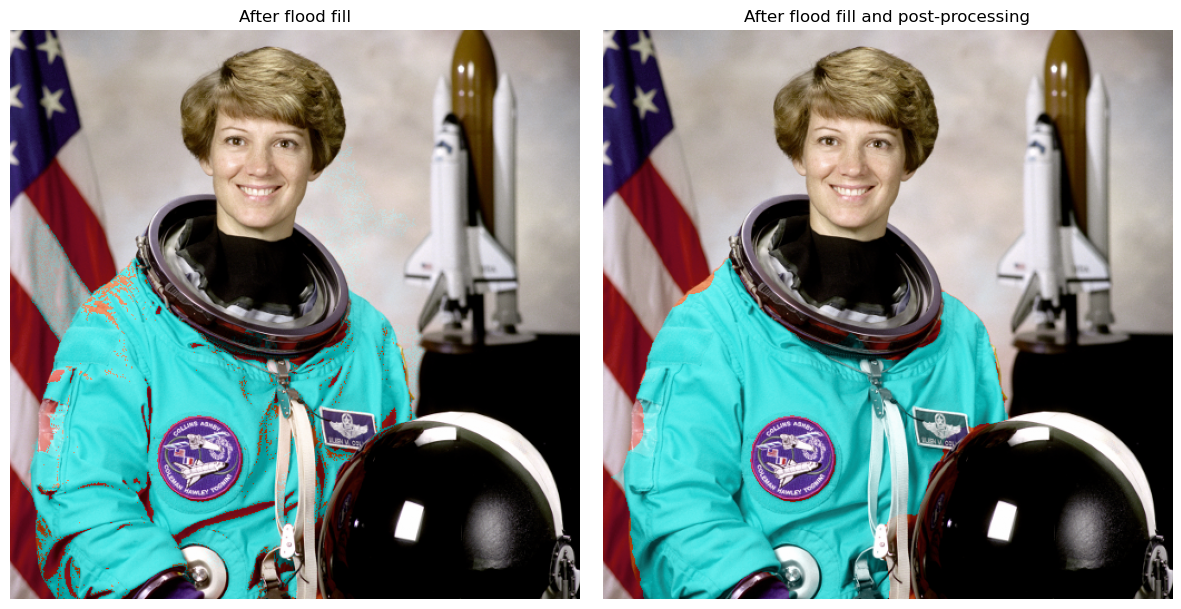

In [6]:
img = skimage.data.astronaut()
img_hsv = skimage.color.rgb2hsv(img)
img_hsv_copy = img_hsv.copy()

# flood function returns a mask of flooded pixels
mask = skimage.segmentation.flood(img_hsv[..., 0], (313, 160), tolerance=0.016)
# Set pixels of mask to new value for hue channel
img_hsv[mask, 0] = 0.5

# Post-processing in order to improve the result
# Remove white pixels from flag, using saturation channel
mask_postprocessed = np.logical_and(mask,
                                    img_hsv_copy[..., 1] > 0.4)

# Remove this structures with binary opening
mask_postprocessed = skimage.morphology.binary_opening(mask_postprocessed, np.ones((3,3)))

# Fill small holes with binary closing
mask_postprocessed = skimage.morphology.binary_closing(mask_postprocessed, skimage.morphology.disk(20))

img_hsv_copy[mask_postprocessed, 0] = 0.5

fig, ax = plt.subplots(1, 2, figsize=(12,6))

ax[0].set_title("After flood fill")
ax[0].imshow(skimage.color.hsv2rgb(img_hsv))
ax[0].axis('off')

ax[1].set_title("After flood fill and post-processing")
ax[1].imshow(skimage.color.hsv2rgb(img_hsv_copy))
ax[1].axis('off')

fig.tight_layout()
plt.show()